In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas  as pd

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)

import seaborn as sns

In [2]:
df= pd.read_csv('../data/processed/unique.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1316 non-null   int64  
 1   Brand                   1316 non-null   object 
 2   Mobile Name             1316 non-null   object 
 3   Front Camera (in MP)    1316 non-null   int64  
 4   Primary Camera (in MP)  1316 non-null   int64  
 5   Memory                  1316 non-null   int64  
 6   RAM                     1316 non-null   int64  
 7   Processor Performance   1316 non-null   float64
 8   Battery Power(in mAh)   1316 non-null   float64
 9   Screen Height           1316 non-null   int64  
 10  Screen Width            1316 non-null   int64  
 11  Ratings                 1316 non-null   float64
 12  Price                   1316 non-null   float64
 13  Mobile Category         1316 non-null   object 
 14  Price Range             1316 non-null   

In [3]:
df.head()

,index,Brand,Mobile Name,Front Camera (in MP),Primary Camera (in MP),Memory,RAM,Processor Performance,Battery Power(in mAh),Screen Height,Screen Width,Ratings,Price,Mobile Category,Price Range,Cluster
0,0,Apple,iPhone 14 Pro Max,32,200,1024,24,5.0,1074.0,2520,1080,4.0,119405.30,Flagship,130000-140000,2
1,1,Apple,iPhone 14 Pro Max,32,200,512,24,5.0,1074.0,2520,1080,4.9,113962.24,Flagship,110000-120000,2
2,2,Apple,iPhone 14 Pro,32,200,512,24,5.0,1086.0,2460,1080,3.4,222232.56,Flagship,220000-230000,2
3,4,Apple,iPhone 14 Pro Max,32,200,1024,16,5.0,1074.0,2520,1080,4.2,219022.20,Flagship,210000-220000,2
4,6,Apple,iPhone 12 Pro,32,108,1024,16,5.0,1788.5,2660,1170,4.4,216084.16,Flagship,210000-220000,2


In [4]:
df.shape

(1316, 16)

In [5]:
df["Brand"].unique()

array(['Apple', 'Pixel', 'Oneplus', 'Samsung', 'Oppo', 'Motorola',
       'Huawei', 'Vivo', 'Realme', 'RedMi'], dtype=object)

In [6]:
numeric = df.select_dtypes(include=[np.number])
numeric_min_max = numeric.agg(['min', 'max'])
print(numeric_min_max.T)
print(len(numeric.columns))

categories=set(df.columns)-set(numeric.columns)
print(categories)


                            min        max
index                      0.00    2998.00
Front Camera (in MP)       8.00      32.00
Primary Camera (in MP)    12.00     200.00
Memory                    32.00    1024.00
RAM                        3.00      24.00
Processor Performance      2.00       5.00
Battery Power(in mAh)    533.00    1900.50
Screen Height           1440.00    3120.00
Screen Width             720.00    1440.00
Ratings                    1.60       5.00
Price                   2268.12  222232.56
Cluster                    0.00       4.00
12
{'Mobile Category', 'Mobile Name', 'Price Range', 'Brand'}


###### Average Prices of Phones per Brand

      Brand         Price
0     Apple  67095.524737
8   Samsung  59256.337154
3   Oneplus  53399.622348
5     Pixel  50831.045610
2  Motorola  49905.771923
4      Oppo  48836.181364
9      Vivo  47139.087479
1    Huawei  41485.951220
7     RedMi  39631.174310
6    Realme  37047.151000


<function matplotlib.pyplot.show(close=None, block=None)>

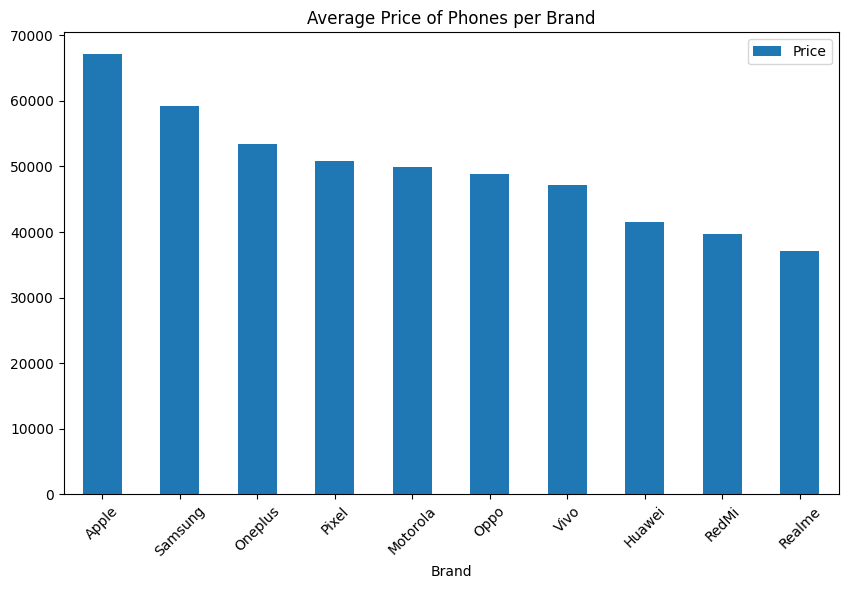

In [7]:
avg_price_per_brand = df.groupby('Brand')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
print(avg_price_per_brand)

avg_price_per_brand.plot(kind='bar', x='Brand', y='Price', figsize=(10, 6))
plt.title('Average Price of Phones per Brand')
plt.xticks(rotation=45)
plt.show

      Brand   Ratings
0     Apple  4.391203
3   Oneplus  4.231565
5     Pixel  4.227683
7     RedMi  4.004598
6    Realme  3.983357
1    Huawei  3.924146
4      Oppo  3.919545
8   Samsung  3.903211
9      Vivo  3.891597
2  Motorola  3.845577


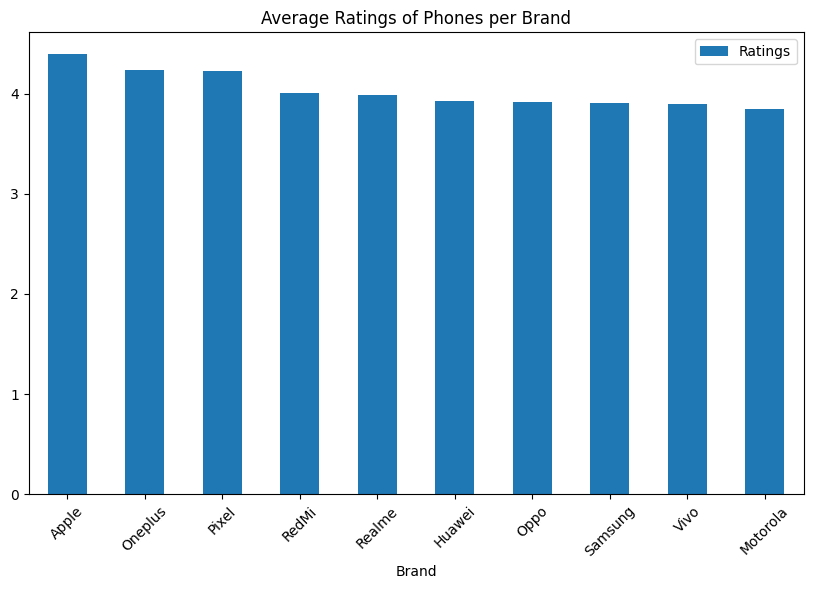

In [8]:
avg_rating_per_brand = df.groupby('Brand')['Ratings'].mean().reset_index().sort_values(by='Ratings', ascending=False)
print(avg_rating_per_brand)

avg_rating_per_brand.plot(kind='bar', x='Brand', y='Ratings', figsize=(10, 6))
plt.title('Average Ratings of Phones per Brand')
plt.xticks(rotation=45)
plt.show()

## Based on Category

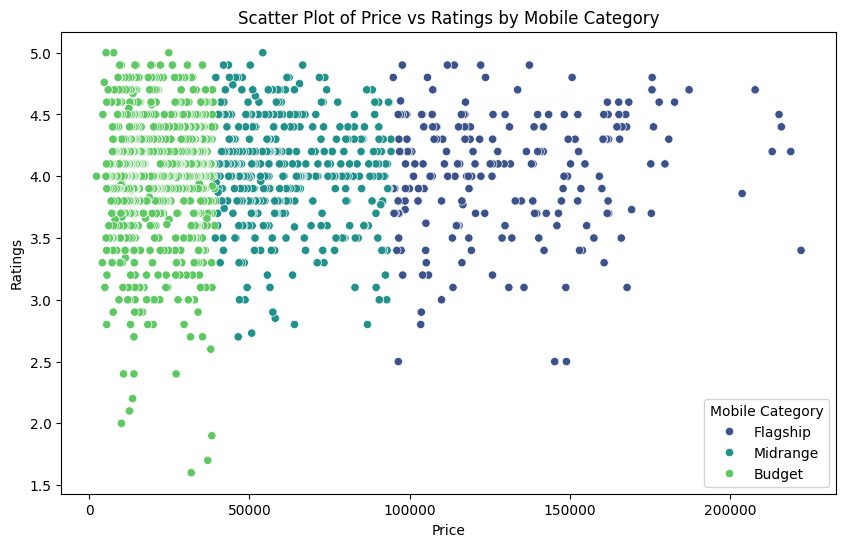

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Ratings', hue='Mobile Category', palette='viridis')
plt.title('Scatter Plot of Price vs Ratings by Mobile Category')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.legend(title='Mobile Category')
plt.show()

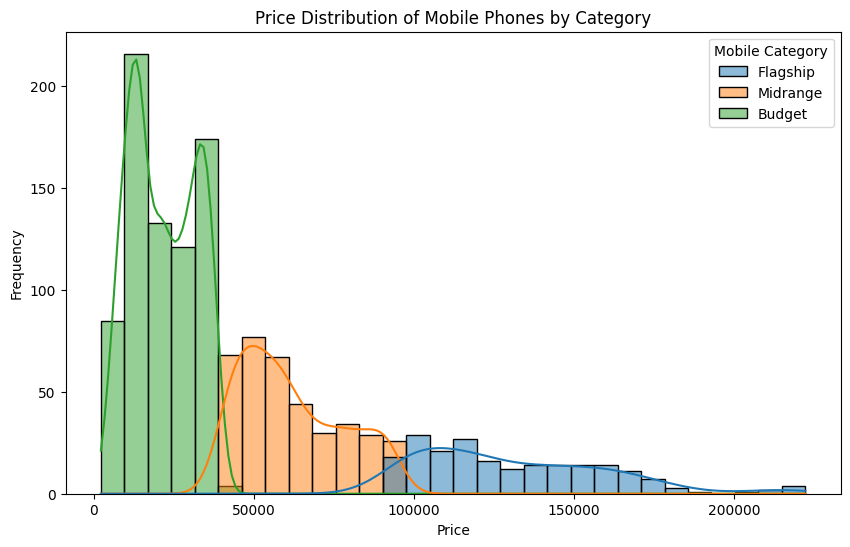

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Price', bins=30, kde=True, hue='Mobile Category')
plt.title('Price Distribution of Mobile Phones by Category')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

######  Average price and ratings per mobile category


Distribution of Mobile Categories:
Mobile Category
Budget      733
Midrange    375
Flagship    208
Name: count, dtype: int64


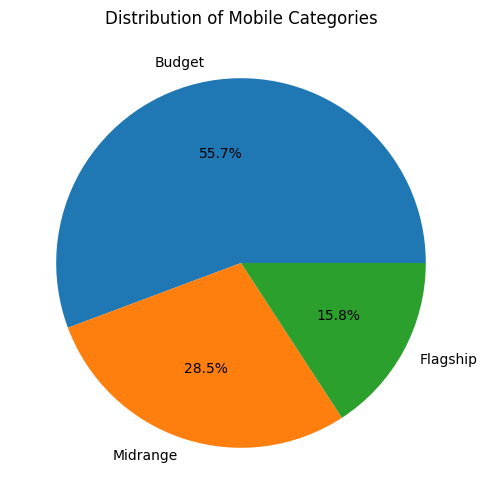

In [11]:

# Distribution of mobile categories
category_distribution = df['Mobile Category'].value_counts()
print("\nDistribution of Mobile Categories:")
print(category_distribution)

# Plotting the distribution of mobile categories
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Mobile Categories')
plt.ylabel('')
plt.show()



###### Average Price and Ratings per Category

                         Price   Ratings
Mobile Category                         
Flagship         131150.851683  4.035673
Midrange          61854.702907  4.035973
Budget            21671.427763  4.002906


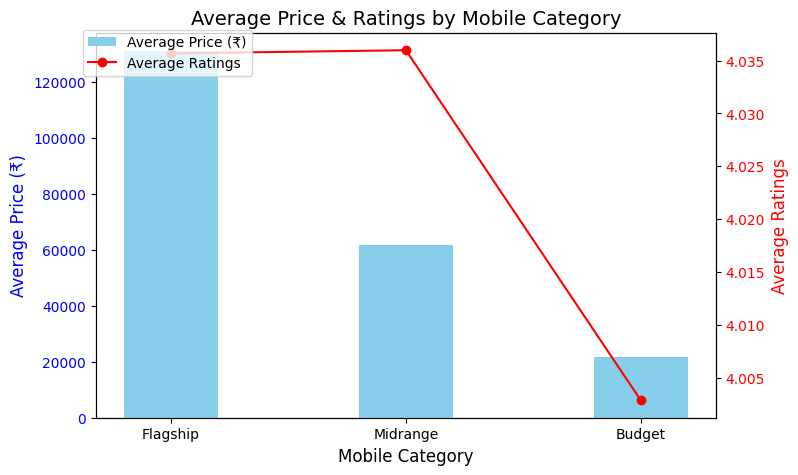

In [12]:
avg_price_rating = df.groupby('Mobile Category')[['Price', 'Ratings']].mean().sort_values(by='Price', ascending=False)
print(avg_price_rating)


import numpy as np
import matplotlib.pyplot as plt

# Data
categories = avg_price_rating.index
price_values = avg_price_rating["Price"]
rating_values = avg_price_rating["Ratings"]

x = np.arange(len(categories))  # X positions for categories
width = 0.4  # Bar width

fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary Y-axis (Price)
ax1.bar(x, price_values, width, color="skyblue", label="Average Price (₹)")
ax1.set_xlabel("Mobile Category", fontsize=12)
ax1.set_ylabel("Average Price (₹)", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Secondary Y-axis (Ratings)
ax2 = ax1.twinx()  # Create second y-axis
ax2.plot(x, rating_values, marker="o", linestyle="-", color="red", label="Average Ratings")
ax2.set_ylabel("Average Ratings", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

# X-axis labels
plt.xticks(x, categories)

# Titles and Legends
plt.title("Average Price & Ratings by Mobile Category", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()


In [13]:
groupby_category_price=df.groupby('Mobile Category')[['Price',"Ratings"]].agg(['mean','min','max','count'])

groupby_category_price = groupby_category_price.reindex(['Budget', 'Midrange', 'Flagship'])
groupby_category_price

Price                              Ratings                
                          mean       min        max count      mean  min  max count
Mobile Category                                                                    
Budget            21671.427763   2268.12   39191.75   733  4.002906  1.6  5.0   733
Midrange          61854.702907  39247.64   94220.99   375  4.035973  2.7  5.0   375
Flagship         131150.851683  94913.73  222232.56   208  4.035673  2.5  4.9   208

###### Minimum and Maximum Price per Mobile Category:


Minimum and Maximum Price per Mobile Category:
  Mobile Category       min        max
0          Budget   2268.12   39191.75
1        Flagship  94913.73  222232.56
2        Midrange  39247.64   94220.99


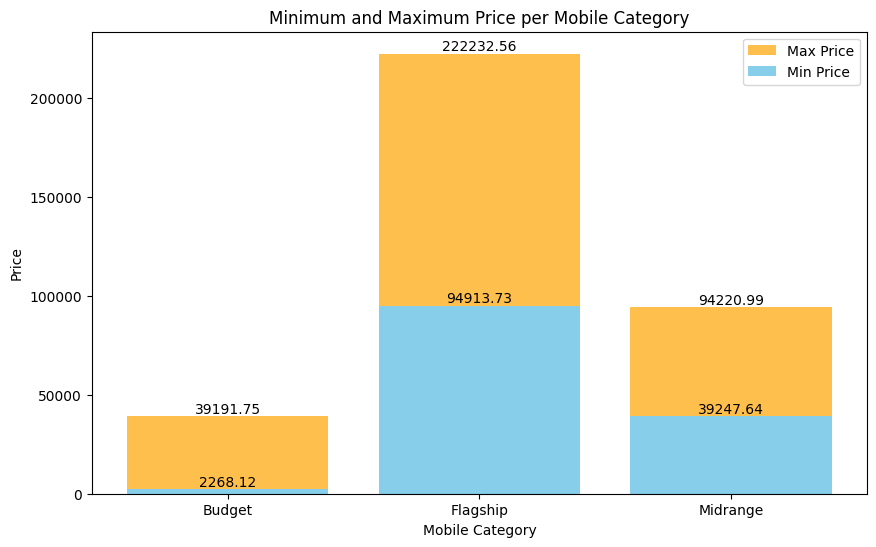

In [14]:
# Plotting the minimum and maximum price per mobile category

min_max_price_per_category = df.groupby('Mobile Category')['Price'].agg(['min', 'max',
                                                                         ]).reset_index()
print("\nMinimum and Maximum Price per Mobile Category:")
print(min_max_price_per_category)


fig, ax = plt.subplots(figsize=(10, 6))

max_bars = ax.bar(min_max_price_per_category['Mobile Category'], min_max_price_per_category['max'], label='Max Price', color='orange', alpha=0.7)

min_bars = ax.bar(min_max_price_per_category['Mobile Category'], min_max_price_per_category['min'], label='Min Price', color='skyblue')


for bar in max_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
for bar in min_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


ax.set_xlabel('Mobile Category')
ax.set_ylabel('Price')
ax.set_title('Minimum and Maximum Price per Mobile Category')
ax.legend()

plt.show()

In [15]:
category_counts = df.groupby(['Brand', 'Mobile Category']).size().unstack(fill_value=0)
print(category_counts)

print("\n\n")
apple_models = df[df['Brand'] == 'Apple']['Mobile Name'].unique()
print(apple_models)


Mobile Category  Budget  Flagship  Midrange
Brand                                      
Apple                46        30        57
Huawei               24         4        13
Motorola             84        27        45
Oneplus              65        22        28
Oppo                 59        18        33
Pixel                41        13        28
Realme              100         9        31
RedMi               115        14        45
Samsung             126        55        65
Vivo                 73        16        30



['iPhone 14 Pro Max' 'iPhone 14 Pro' 'iPhone 12 Pro' 'iPhone 12 Mini'
 'iPhone 14' 'iPhone 13 Pro' 'iPhone 13 Mini' 'iPhone 11 Pro' 'iPhone 12'
 'iPhone 13' 'iPhone 11' 'iPhone 6S' 'iPhone 8' 'iPhone 8 Plus'
 'iPhone 7 Plus' 'iPhone SE 2022' 'iPhone 7' 'iPhone SE 2020' 'iPhone XR'
 'iPhone X']


In [16]:
min_max_price_per_brand = df.groupby('Brand')['Price'].agg(['min', 'max']).reset_index()


In [17]:

min_max_price_per_brand['Min Priced Mobile'] = min_max_price_per_brand['Brand'].apply(lambda brand: df[df['Brand'] == brand].nsmallest(1, 'Price')['Mobile Name'].values[0])
min_max_price_per_brand['Max Priced Mobile'] = min_max_price_per_brand['Brand'].apply(lambda brand: df[df['Brand'] == brand].nlargest(1, 'Price')['Mobile Name'].values[0])

print(min_max_price_per_brand)

      Brand      min        max   Min Priced Mobile   Max Priced Mobile
0     Apple  5928.28  222232.56           iPhone 6S       iPhone 14 Pro
1    Huawei  5261.44  147414.15  Huawei MatePad Pro      Huawei Nova 11
2  Motorola  4686.32  152509.41            Moto G71           Moto G200
3   Oneplus  5492.78  176158.76           OnePlus 6         OnePlus 11R
4      Oppo  7403.84  152543.28            Oppo A54   Oppo Find N2 Flip
5     Pixel  5841.19  182752.66             Pixel 1         Pixel 7 Pro
6    Realme  4079.86  107249.43          Realme C25      Realme 10 Pro+
7     RedMi  2268.12  105109.38            Redmi 7A  Redmi Note 12 Pro+
8   Samsung  5433.53  169349.13          Galaxy A12     Galaxy Z Fold 4
9      Vivo  5208.85  145311.78           Vivo Y100            Vivo X80
